In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Load your time series data (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('../Datasets_1/Training Dataset/Reliance_Industries_Ltd.csv')

# Define a function to perform ARIMA grid search and return the best model
def arima_grid_search(data, p_values, d_values, q_values):
    best_aic = np.inf
    best_order = None

    for p, d, q in product(p_values, d_values, q_values):
        order = (p, d, q)
        try:
            model = ARIMA(data, order=order)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
        except:
            continue

    return best_order

# Define the ranges for p, d, and q
p_values = range(0, 4)  # adjust the range based on your data and expectations
d_values = range(0, 2)  # adjust the range based on your data and expectations
q_values = range(0, 4)  # adjust the range based on your data and expectations

# Perform grid search
best_order = arima_grid_search(df['Close'], p_values, d_values, q_values)


# # Fit the ARIMA model with the best parameters
best_model = ARIMA(df['Close'], order=best_order)
best_model_fit = best_model.fit()

# # Print the best parameters and model summary
print(f'Best ARIMA Order: {best_order}')
print(best_model_fit.summary())


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregres

Best ARIMA Order: (2, 1, 2)
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2708
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10300.936
Date:                Mon, 04 Dec 2023   AIC                          20611.872
Time:                        13:31:50   BIC                          20641.390
Sample:                             0   HQIC                         20622.545
                               - 2708                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3134      0.072     18.370      0.000       1.173       1.454
ar.L2         -0.6218      0.075     -8.292      0.000      -0.769      -0.475
ma.L1         -1.2380   

(array([6.21703175e-03, 6.52788334e-03, 4.70987254e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.70987254e-06]),
 array([-7.86709387e+01, -2.66222724e-01,  7.81384932e+01,  1.56543209e+02,
         2.34947925e+02,  3.13352641e+02,  3.91757357e+02,  4.70162073e+02,
         5.48566789e+02,  6.26971505e+02,  7.05376221e+02]),
 <BarContainer object of 10 artists>)

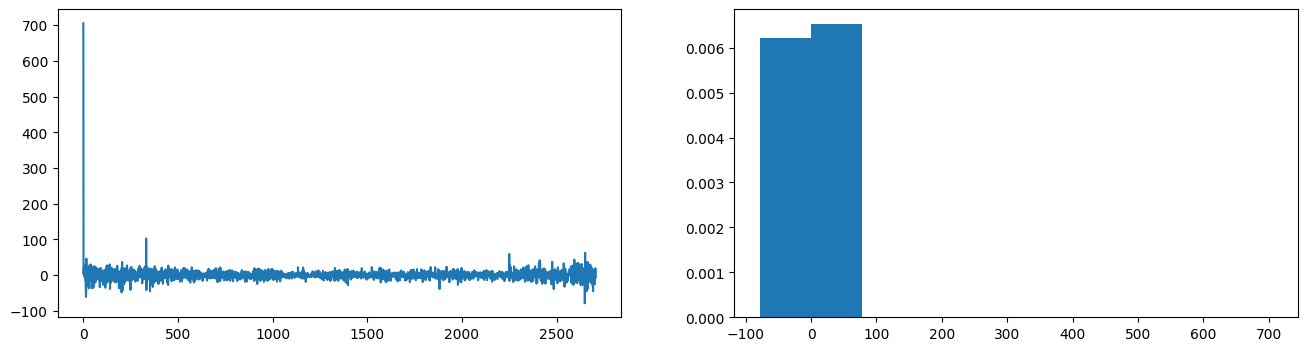

In [3]:
import matplotlib.pyplot as plt

residuals=pd.DataFrame(best_model_fit.resid)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals,density=True)


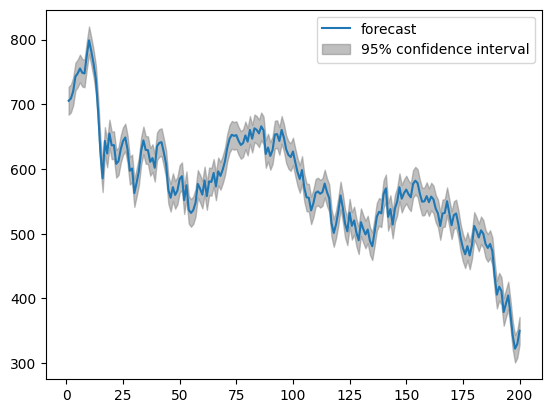

In [4]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(best_model_fit,start=1,end=200,dynamic=False,alpha=0.05);

1      705.383254
2      708.996255
3      719.947812
4      742.854031
5      747.751162
          ...    
238    335.356706
239    333.606974
240    316.972908
241    311.954623
242    308.592550
Name: predicted_mean, Length: 242, dtype: float64


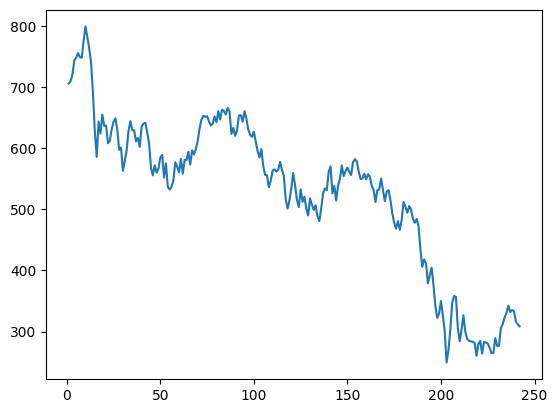

In [5]:
next_day_price=best_model_fit.get_prediction(start=1,end=242,alpha=0.05)
print(next_day_price.predicted_mean)
plt.plot(next_day_price.predicted_mean)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


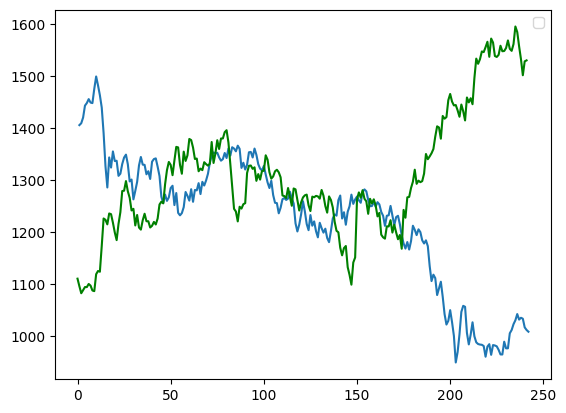

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



test=pd.read_csv("../Datasets_1/Testing Dataset/Reliance_Industries_Ltd.csv")
plt.plot(next_day_price.predicted_mean+700);
plt.plot(test['Close'], color="green")
plt.legend()
plt.show()

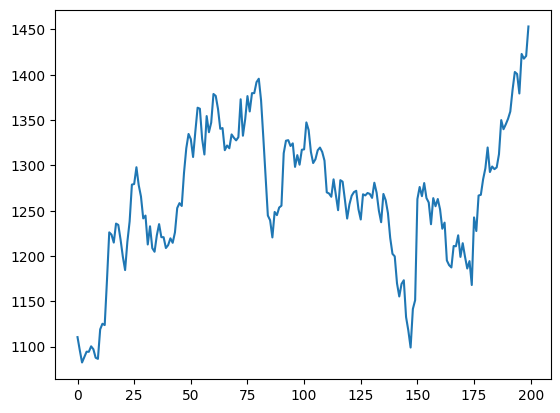

In [7]:
test=pd.read_csv("../Datasets_1/Testing Dataset/Reliance_Industries_Ltd.csv")
test_head=test['Close'].head(200)
# print(test_head)
plt.plot(test_head)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Example lists of data
y1 = next_day_price
y2 = test_head

# Generate x-values based on the length of the lists
x = np.arange(len(y1))

# Plot the first list
plt.plot(x, y1, label='Forecasted ', color='red')

# Plot the second list on the same graph
plt.plot(x, y2, label='Actual', color='green')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Lists on the Same Graph')

# Add a legend to differentiate between lists
plt.legend()

# Show the plot
plt.show()


TypeError: object of type 'PredictionResultsWrapper' has no len()

In [9]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
test=pd.read_csv("../Datasets_1/Testing Dataset/Reliance_Industries_Ltd.csv")
predictions=best_model_fit.predict(start=len(df)+1,end=len(df)+len(test),type='levels')
# print(predictions,test['Close'])


print(predictions.head(50))

mape = np.mean(np.abs((predictions-test['Close']) / test['Close'])) * 100
rmse = np.sqrt(mean_squared_error(test['Close'], predictions))

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(test['Close'], predictions)

print(f'MAPE: {mape:.2f}%')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')



2709    1109.212546
2710    1107.916843
2711    1106.932798
2712    1106.445989
2713    1106.418479
2714    1106.685044
2715    1107.052266
2716    1107.368837
2717    1107.556293
2718    1107.605660
2719    1107.553939
2720    1107.455311
2721    1107.357930
2722    1107.291354
2723    1107.264461
2724    1107.270537
2725    1107.295239
2726    1107.323906
2727    1107.346198
2728    1107.357652
2729    1107.358835
2730    1107.353266
2731    1107.345217
2732    1107.338107
2733    1107.333774
2734    1107.332504
2735    1107.333529
2736    1107.335667
2737    1107.337836
2738    1107.339356
2739    1107.340004
2740    1107.339910
2741    1107.339383
2742    1107.338750
2743    1107.338246
2744    1107.337977
2745    1107.337938
2746    1107.338054
2747    1107.338230
2748    1107.338389
2749    1107.338489
2750    1107.338521
2751    1107.338501
2752    1107.338455
2753    1107.338407
2754    1107.338372
2755    1107.338357
2756    1107.338358
2757    1107.338369
2758    1107.338383


C:\Users\Hp\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
